In [130]:
using Pkg

In [209]:
Pkg.add("Plots")
Pkg.build("PyCall")
Pkg.add("Dates")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
  Building Conda ─→ `~/.julia/packages/Conda/CpuvI/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/0jMpb/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [210]:
using CSV
using DataFrames
using SQLite
using Plots
using StatPlots
using PyCall
using Pandas
using Dates

In [211]:
path = "/Users/adityakamboj/Desktop/Data Integrity"

"/Users/adityakamboj/Desktop/Data Integrity"

In [212]:
customer = CSV.read(joinpath(path, "customer.csv"))
println(size(customer))
first(customer, 5)

(91, 7)


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
2,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
3,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
4,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
5,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden


In [213]:
orders = CSV.read(joinpath(path, "orders.csv");types=[Int64,Int64,Int64,String,Int64])
println(size(orders))
first(orders, 5)

(196, 5)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
,Int64,Int64,Int64,String,Int64
1,10248,90,5,1996-07-04,3
2,10249,81,6,1996-07-05,1
3,10250,34,4,1996-07-08,2
4,10251,84,3,1996-07-08,1
5,10252,76,4,1996-07-09,2


In [214]:
orderitem = CSV.read(joinpath(path, "orderitem.csv"))
println(size(orderitem))
first(orderitem, 5)

(518, 4)


,OrderItemID,OrderID,ProductID,Quantity
,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,10248,11,12
2,2,10248,42,10
3,3,10248,72,5
4,4,10249,14,9
5,5,10249,51,40


In [215]:
product = CSV.read(joinpath(path,"product.csv"))
println(size(product))
first(product,5)

(77, 6)


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
,Int64⍰,String⍰,Int64⍰,Int64⍰,String⍰,Float64⍰
1,1,Chais,1,1,10 boxes x 20 bags,18.0
2,2,Chang,1,1,24 - 12 oz bottles,19.0
3,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0
4,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.0
5,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35


In [216]:
supplier = CSV.read(joinpath(path, "supplier.csv"))
println(size(supplier))
first(supplier,5)

(29, 8)


,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
2,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
3,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735
4,4,Tokyo Traders,Yoshi Nagase,9-8 Sekimai Musashino-shi,Tokyo,100,Japan,(03) 3555-5011
5,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54


In [217]:
acme = SQLite.DB()              

SQLite.load!(customer, acme, "customer")

"customer"

In [218]:
SQLite.load!(orders, acme, "orders")

"orders"

In [219]:
SQLite.load!(orderitem, acme, "orderitem")

"orderitem"

In [220]:
SQLite.load!(product, acme,"product")

"product"

In [221]:
SQLite.load!(supplier, acme, "supplier")

"supplier"

## 1.	Sales analysis
#### Company’s sales trend over time?

In [224]:
DataFrame(SQLite.Query(acme,"""create table monthly_sales as select strftime('%Y-%m',OrderDate) Months, 
avg(price*quantity) sales
        from orders inner join orderitem on orders.OrderID = orderitem.OrderID 
                    join product on product.productid = orderitem.productid
                    group by months
order by sales"""))


""
""


In [225]:
SalesTrend = DataFrame(SQLite.Query(acme,"""select *,
case when months = '1996-07' then 'July' 
when months = '1996-08' then 'August'
when months = '1996-09' then 'September'
when months = '1996-10' then 'October'
when months = '1996-11' then 'November' 
when months = '1996-12' then 'December'
when months = '1997-01' then 'January'
when months = '1997-02' then 'Feburary' end as Month      
from monthly_sales
Order by Months;"""))

,Months,sales,Month
,String⍰,Float64⍰,String⍰
1,1996-07,640.336,July
2,1996-08,482.398,August
3,1996-09,606.414,September
4,1996-10,705.872,October
5,1996-11,941.879,November
6,1996-12,786.682,December
7,1997-01,981.182,January
8,1997-02,713.533,Feburary


In [226]:
gr()

Plots.GRBackend()

In [227]:
x = SalesTrend[:,3]
y = SalesTrend[:,2]

8-element Array{Union{Missing, Float64},1}:
 640.336440677966 
 482.3984057971014
 606.4140350877193
 705.8724657534245
 941.8786363636365
 786.6818518518518
 981.182          
 713.5325         

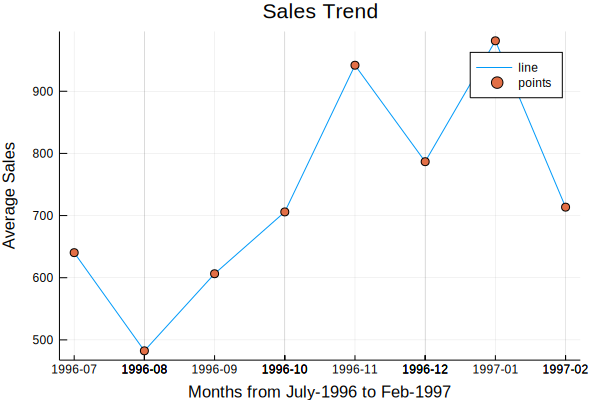

In [242]:
plot(SalesTrend[:,1], SalesTrend[:,2], label = "line")
scatter!(SalesTrend[:,1], SalesTrend[:,2], label = "points")
xlabel!("Months from July-1996 to Feb-1997")
ylabel!("Average Sales")
title!("Sales Trend")

## 2.	Product Analysis
#### Product popularity by quantity sold since inception 

In [248]:
#answer 2.1
Prod = DataFrame(SQLite.Query(acme,"""select productname, sum(quantity) as Total_Qty
        from product join orderitem on product.productid = orderitem.productid
        group by productname 
        order by Total_Qty desc
        """))

,ProductName,Total_Qty
,String⍰,Int64⍰
1,Gorgonzola Telino,458
2,Camembert Pierrot,430
3,Steeleye Stout,369
4,Raclette Courdavault,346
5,Chang,341
6,Pavlova,338
7,Fløtemysost,336
8,Alice Mutton,331
9,Tarte au sucre,325


In [244]:
Pkg.build("NodeJS")

  Building NodeJS → `~/.julia/packages/NodeJS/rx0mH/deps/build.log`


In [245]:
Pkg.add("VegaLite")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [246]:
using VegaLite

┌ Info: Recompiling stale cache file /Users/adityakamboj/.julia/compiled/v1.0/VegaLite/lrJqi.ji for VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1190


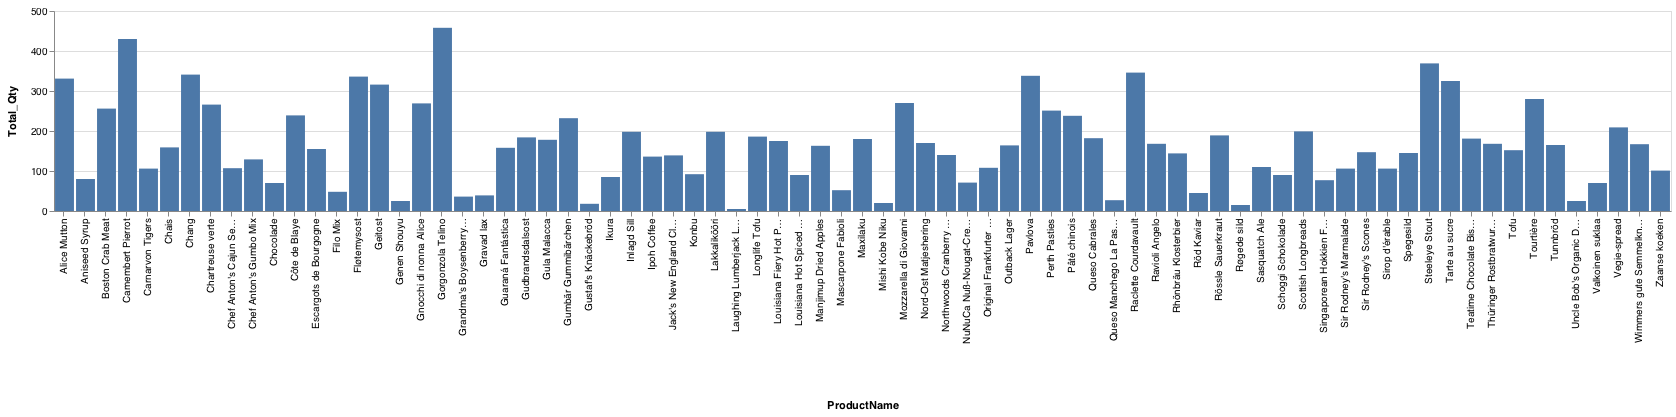

In [249]:
Prod |> @vlplot(:bar, x=:ProductName, y=:Total_Qty)

#### Top 10 revenue generating products in the Fiscal Year

In [250]:
TopTenProd = DataFrame(SQLite.Query(acme,"""select productname, sum(price*quantity) as sales
from product join orderitem on product.productid = orderitem.productid
        join orders on orderitem.orderid = orders.orderid
        where orderdate between '1996-07-04' and '1996-12-31'
        group by productname
        order by sales desc
        limit 10"""
))    

,ProductName,sales
,String⍰,Float64⍰
1,Côte de Blaye,36890.0
2,Thüringer Rostbratwurst,15226.2
3,Raclette Courdavault,12705.0
4,Camembert Pierrot,12580.0
5,Tarte au sucre,12325.0
6,Alice Mutton,9126.0
7,Mozzarella di Giovanni,9048.0
8,Manjimup Dried Apples,8639.0
9,Sir Rodney's Marmalade,8586.0


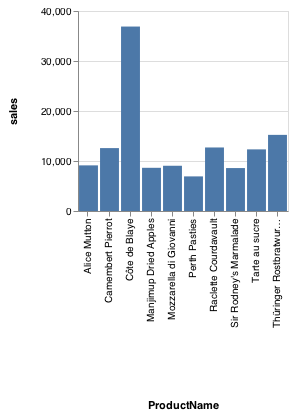

In [251]:
TopTenProd |> @vlplot(:bar, x=:ProductName, y=:sales)

#### Products that have not been ordered in the past three months as measured from Fiscal Year End

In [233]:
DataFrame(SQLite.Query(acme,"""SELECT ProductID, ProductName
FROM Product
WHERE ProductID NOT IN (
    SELECT DISTINCT Product.ProductID
    FROM Product
    INNER JOIN Orderitem ON Product.ProductId = Orderitem.ProductId
    INNER JOIN Orders ON Orders.OrderId = Orderitem.OrderId
    WHERE Orders.OrderDate BETWEEN '1996/09/30' AND '1997/01/01'
)"""))     

,ProductID,ProductName
,Int64⍰,String⍰
1,4,Chef Anton's Cajun Seasoning
2,5,Chef Anton's Gumbo Mix
3,6,Grandma's Boysenberry Spread
4,7,Uncle Bob's Organic Dried Pears
5,8,Northwoods Cranberry Sauce
6,10,Ikura
7,15,Genen Shouyu
8,18,Carnarvon Tigers
9,20,Sir Rodney's Marmalade


## 3.	Customer Analysis
#### Fiscal year Revenue by customer’s Country

In [255]:
CustomerCountry = DataFrame(SQLite.Query(acme,"""select country, sum(price*quantity) as Revenue
        from customer inner join orders on customer.customerid = orders.customerid
        inner join orderitem on orders.orderid = orderitem.orderid
        inner join product on orderitem.productid = product.productid
        where orderdate <= '1997-01-01'
        group by country
        order by Revenue desc"""))

,Country,Revenue
,String⍰,Float64⍰
1,USA,59432.4
2,Germany,42770.3
3,Austria,36714.8
4,Brazil,32154.9
5,France,21499.4
6,UK,15905.8
7,Ireland,13204.5
8,Venezuela,13056.3
9,Canada,9939.4


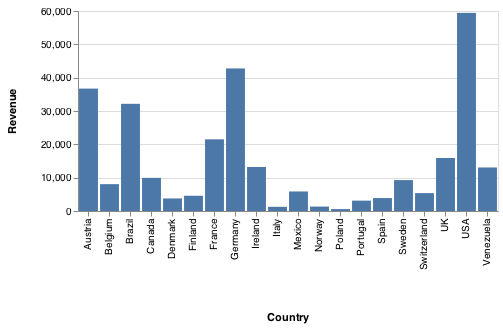

In [256]:
CustomerCountry |> @vlplot(:bar, x=:Country, y=:Revenue)

#### Top 10 customers by revenue during Fiscal year

In [258]:
top10Cust = DataFrame(SQLite.Query(acme,"""select customer.customerid, customername, sum(price*quantity) as revenue
from customer inner join orders on orders.customerid = customer.customerid
inner join orderitem on orders.orderid = orderitem.orderid
inner join product on orderitem.ProductID = product.productid
where  orderdate < '1997-01-01'
group by customername
order by revenue desc
limit 10"""))

,CustomerID,CustomerName,revenue
,Int64⍰,String⍰,Float64⍰
1,20,Ernst Handel,21487.8
2,63,QUICK-Stop,15910.3
3,62,Queen Cozinha,15353.6
4,71,Save-a-lot Markets,15254.0
5,59,Piccolo und mehr,15227.0
6,65,Rattlesnake Canyon Grocery,13584.4
7,25,Frankenversand,13384.3
8,37,Hungry Owl All-Night Grocers,13204.5
9,7,Blondel père et fils,12490.3


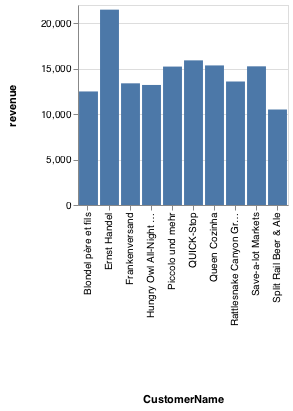

In [260]:
top10Cust |> @vlplot(:bar, x=:CustomerName, y=:revenue)

#### Customers are acquired each month

In [261]:
CustomersAcquired = DataFrame(SQLite.Query(acme,"""Select count(distinct(CustomerName)) as Customer_Count, strftime('%Y-%m', orderdate) as months
from Customer
join Orders on 
Orders.CustomerID = Customer.CustomerID
join OrderItem on
orders.orderID = Orderitem.orderID
join product on
product.productId = orderitem.productID
group by months
order by months
        """))


,Customer_Count,months
,Int64⍰,String⍰
1,20,1996-07
2,18,1996-08
3,19,1996-09
4,20,1996-10
5,21,1996-11
6,25,1996-12
7,27,1997-01
8,11,1997-02


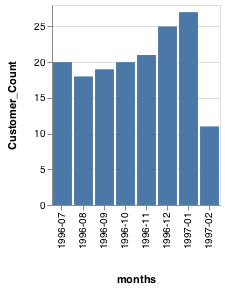

In [265]:
CustomersAcquired |> @vlplot(:bar, x=:months, y=:Customer_Count)

#### Customers are deemed attrited in the database

In [237]:
DataFrame(SQLite.Query(acme,"""SELECT customer.*
FROM Customer 
LEFT JOIN Orders 
    ON orders.CustomerID = Customer.CustomerID 
    AND orders.OrderDate BETWEEN '1996/09/01' AND '1997/03/01'
WHERE orders.OrderID IS NULL
"""))

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
2,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
3,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
4,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
5,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
6,6,Blauer See Delikatessen,Hanna Moos,Forsterstr. 57,Mannheim,68306,Germany
7,8,Bólido Comidas preparadas,Martín Sommer,"C/ Araquil, 67",Madrid,28023,Spain
8,9,Bon app',Laurence Lebihans,"12, rue des Bouchers",Marseille,13008,France
9,11,B's Beverages,Victoria Ashworth,Fauntleroy Circus,London,EC2 5NT,UK


## 4.	Supplier Analysis
#### Fiscal year Revenue by supplier Country

In [268]:
RevenueSupplierCountry = DataFrame(SQLite.Query(acme,"""select country, sum(price*quantity) as Revenue from Supplier
inner join Product on Supplier.SupplierID = Product.SupplierID
inner join orderitem on Product.ProductID = OrderItem.ProductID
inner join Orders on OrderItem.OrderID = Orders.OrderID
where orderdate < '1997-01-01'
group by country
order by Revenue desc
        """))

,Country,Revenue
,String⍰,Float64⍰
1,France,69016.8
2,Australia,43169.3
3,Germany,38936.3
4,USA,27246.6
5,Italy,22503.5
6,Canada,18944.3
7,UK,18783.3
8,Norway,11468.0
9,Singapore,9458.1


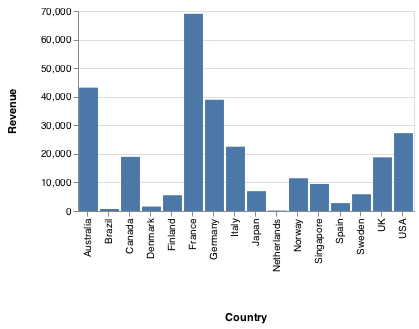

In [269]:
RevenueSupplierCountry |> @vlplot(:bar, x=:Country, y=:Revenue)

#### Top 3 supplier of Fiscal year and their business volume 

In [270]:
Top3Supplier = DataFrame(SQLite.Query(acme,"""select sum(price*quantity) Revenue, suppliername, supplier.supplierid from supplier 
inner join product on supplier.supplierid = product.SupplierID
inner join orderitem on product.productid = orderitem.productid
inner join orders on orderitem.OrderID = Orders.Orderid
where orderdate < '1996-12-31'
group by suppliername
order by revenue desc
limit 3
        """))

,Revenue,SupplierName,SupplierID
,Float64⍰,String⍰,Int64⍰
1,41678.0,Aux joyeux ecclésiastiques,18
2,27273.5,"Pavlova, Ltd.",7
3,27072.2,Plutzer Lebensmittelgroßmärkte AG,12


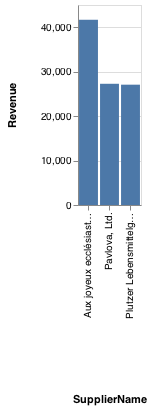

In [271]:
Top3Supplier |> @vlplot(:bar, x=:SupplierName, y=:Revenue)

#### Bottom 3 volume suppliers during Fiscal year

In [273]:
Bottom3Supplier = DataFrame(SQLite.Query(acme,"""select sum(price*quantity) Revenue, suppliername, supplier.supplierid from supplier 
inner join product on supplier.supplierid = product.SupplierID
inner join orderitem on product.productid = orderitem.productid
inner join orders on orderitem.OrderID = Orders.Orderid
where orderdate < '1996-12-31'
group by suppliername
order by revenue 
limit 3
        """))

,Revenue,SupplierName,SupplierID
,Float64⍰,String⍰,Int64⍰
1,152.0,Zaanse Snoepfabriek,22
2,711.0,Refrescos Americanas LTDA,10
3,1071.0,PB Knäckebröd AB,9


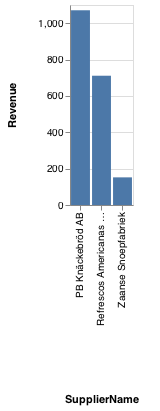

In [274]:
Bottom3Supplier |> @vlplot(:bar, x=:SupplierName, y=:Revenue)